In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
print(installed.packages())

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("GEOquery")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpSoWBUg/downloaded_packages’

'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com








































































































































	‘/tmp/RtmpSoWBUg/downloaded_packages’




Update all/some/none? [a/s/n]: a























	‘/tmp/RtmpSoWBUg/downloaded_packages’



In [ ]:
%%R
library(GEOquery)



Attaching package: ‘BiocGenerics’



    IQR, mad, sd, var, xtabs



    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.






In [ ]:
%%R
geo_data_48350 <- getGEO("GSE48350", GSEMatrix = TRUE)
geo_data_11882 <- getGEO("GSE11882", GSEMatrix = TRUE)



|



/tmp/RtmpSoWBUg/GPL570.soft.gz 



In [ ]:
%%R
geo_data_48350_data <- geo_data_48350[[1]]
geo_data_11882_data <- geo_data_11882[[1]]

In [ ]:
%%R
expression_data_48350 <- exprs(geo_data_48350_data)
sample_data_48350 <- pData(geo_data_48350_data)
feature_data_48350 <- fData(geo_data_48350_data)

expression_data_11882 <- exprs(geo_data_11882_data)
sample_data_11882 <- pData(geo_data_11882_data)
feature_data_11882 <- fData(geo_data_11882_data)

In [ ]:
%%R
head(expression_data_48350)

          GSM300166 GSM300167 GSM300168 GSM300169 GSM300170 GSM300171 GSM300172
1007_s_at 0.8880162 1.4355185 1.6096015  1.754960  1.820730  1.439672  1.587641
1053_at   0.6664604 0.8858521 1.8590777  1.036666  1.421393  1.485035  1.186292
117_at    0.8596384 1.0620298 3.0973945  2.243655  5.060301 13.800817  2.211287
121_at    0.9751495 1.0507448 0.9822838  1.198237  1.039529  0.781454  1.011910
1255_g_at 0.4912547 0.5375254 3.1796446  1.514290  2.185801  3.541644  2.213126
1294_at   0.8344268 0.9291890 1.5193694  1.557089  1.641263  1.026549  2.301065
          GSM300173 GSM300174 GSM300175 GSM300176 GSM300177 GSM300178 GSM300179
1007_s_at 0.5247102 0.7965701 0.5960870 0.7974215 0.8042440 1.7385257 0.8737668
1053_at   0.8766241 0.9177160 1.0181772 1.1045258 0.9100512 0.8454441 0.9551023
117_at    0.8244940 1.6506448 0.7231523 0.8206831 0.7882807 3.0418363 0.9615682
121_at    1.1515149 0.9600830 0.9088924 1.1698936 1.0607997 0.8500785 0.7657404
1255_g_at 1.4224472 5.0114130 1.3302159 

In [ ]:
%%R
head(expression_data_11882)

          GSM300166 GSM300167 GSM300168 GSM300169 GSM300170 GSM300171 GSM300172
1007_s_at 0.8880162 1.4355185 1.6096015  1.754960  1.820730  1.439672  1.587641
1053_at   0.6664604 0.8858521 1.8590777  1.036666  1.421393  1.485035  1.186292
117_at    0.8596384 1.0620298 3.0973945  2.243655  5.060301 13.800817  2.211287
121_at    0.9751495 1.0507448 0.9822838  1.198237  1.039529  0.781454  1.011910
1255_g_at 0.4912547 0.5375254 3.1796446  1.514290  2.185801  3.541644  2.213126
1294_at   0.8344268 0.9291890 1.5193694  1.557089  1.641263  1.026549  2.301065
          GSM300173 GSM300174 GSM300175 GSM300176 GSM300177 GSM300178 GSM300179
1007_s_at 0.5247102 0.7965701 0.5960870 0.7974215 0.8042440 1.7385257 0.8737668
1053_at   0.8766241 0.9177160 1.0181772 1.1045258 0.9100512 0.8454441 0.9551023
117_at    0.8244940 1.6506448 0.7231523 0.8206831 0.7882807 3.0418363 0.9615682
121_at    1.1515149 0.9600830 0.9088924 1.1698936 1.0607997 0.8500785 0.7657404
1255_g_at 1.4224472 5.0114130 1.3302159 

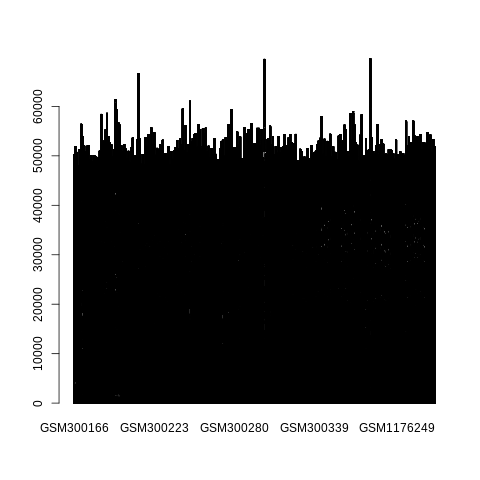

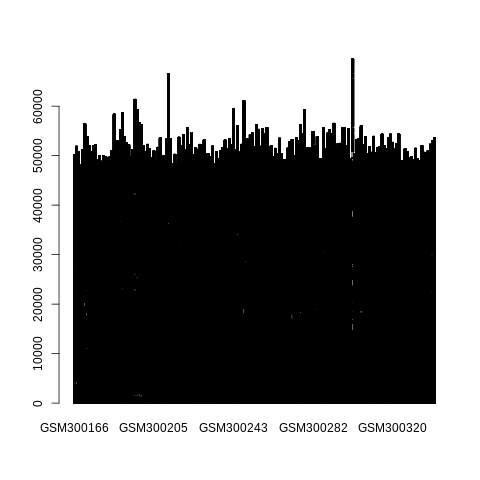

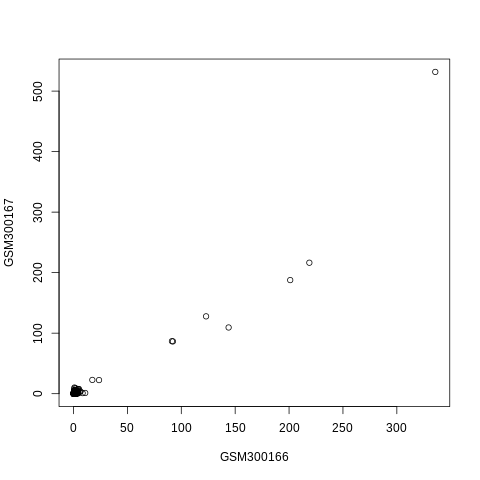

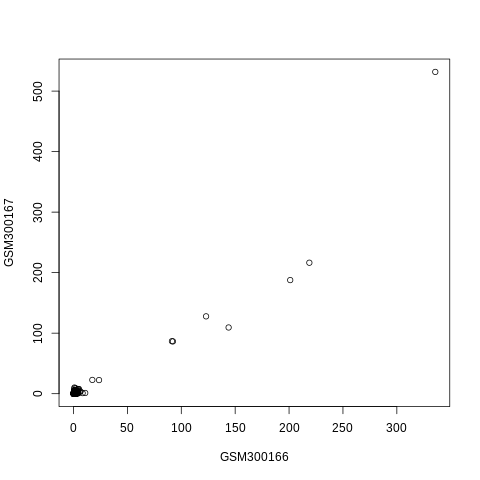

In [ ]:
%%R
barplot(expression_data_48350)
barplot(expression_data_11882)
plot(expression_data_48350)
plot(expression_data_11882)

In [ ]:
%%R
expression_data_48350_numeric <- lapply(expression_data_48350, function(x) {
  as.numeric(as.character(x))
})


In [ ]:
%%R
expression_data_11882_numeric <- lapply(expression_data_11882, function(x) {
  as.numeric(as.character(x))
})

In [ ]:
%%R
min_max_normalize_function <- function(x){
  return ((x-min(x))/(max(x) - min(x)))
}

In [ ]:
%%R
print(nrow(expression_data_48350))
print(ncol(expression_data_48350))

[1] 54675
[1] 253


In [ ]:
%%R
normalized_dataset_48350 <- as.data.frame(expression_data_48350[, 2:253], function(x) {
  if(is.numeric(x)) {
    return(min_max_normalize(x))
  } else {
    return(x)
  }
})

In [ ]:
%%R
print(nrow(expression_data_11882))
print(ncol(expression_data_11882))

[1] 54675
[1] 173


In [ ]:
%%R
normalized_dataset_11882 <- as.data.frame(expression_data_11882[, 2:173], function(x) {
  if(is.numeric(x)) {
    return(min_max_normalize(x))
  } else {
    return(x)
  }
})

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Normalized_GSE11882_expression_data.csv to Normalized_GSE11882_expression_data.csv
Saving Normalized_GSE48350_expression_data.csv to Normalized_GSE48350_expression_data.csv


In [ ]:
%%R
list.files()

[1] "sample_data"


In [ ]:
%%R
working_48350 <- read.csv("Normalized_GSE48350_expression_data.csv")
working_11882 <- read.csv("Normalized_GSE11882_expression_data.csv")

In [ ]:
%%R

install.packages("factoextra")
install.packages("cluster")


(as ‘lib’ is unspecified)

















































































































































































































	‘/tmp/RtmpSoWBUg/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpSoWBUg/downloaded_packages’



In [ ]:
%%R
library(factoextra)
library(cluster)

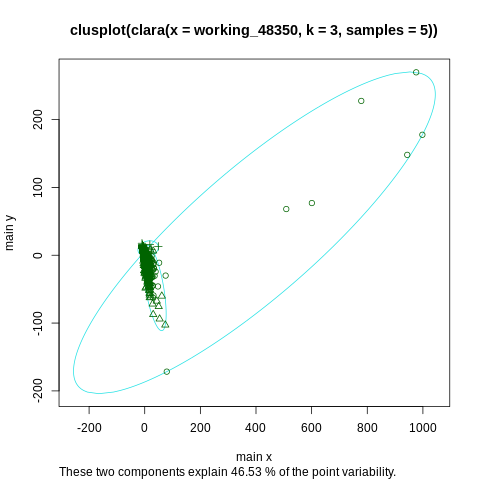

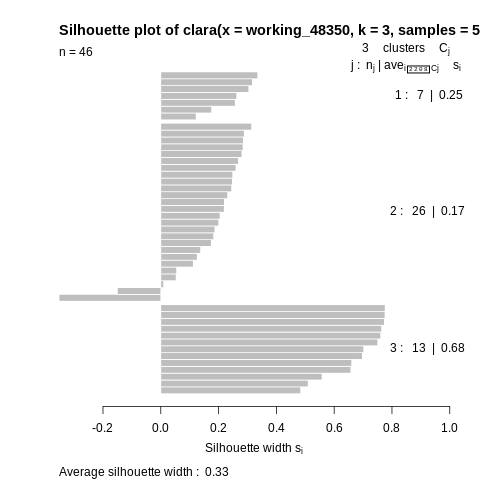

In [ ]:
%%R
clara_result <- clara(working_48350, k = 3, samples = 5)
plot(clara_result, xlab = "main x", ylab = "main y")

In [ ]:
%%R
summary(clara_result)

Object of class 'clara' from call:
 clara(x = working_48350, k = 3, samples = 5) 
Medoids:
       GSM300166   GSM300167   GSM300168   GSM300169   GSM300170    GSM300171
[1,] 0.002537375 0.002220642 0.013956091 0.069548645 0.020755045 0.0029985365
[2,] 0.004290276 0.001847373 0.006828915 0.024216867 0.008083411 0.0009094271
[3,] 0.001792169 0.001109865 0.002112329 0.007141102 0.002488214 0.0002868480
        GSM300172  GSM300173   GSM300174  GSM300175  GSM300176  GSM300177
[1,] 0.0025620959 0.06277107 0.006340853 0.04064509 0.02017180 0.03867925
[2,] 0.0010109178 0.08715422 0.007272978 0.05437834 0.02685315 0.03765153
[3,] 0.0003234531 0.04930851 0.003927939 0.02771699 0.01643582 0.02183807
      GSM300178  GSM300179  GSM300180  GSM300181  GSM300182  GSM300183
[1,] 0.02648059 0.04329608 0.07188843 0.07500127 0.06060839 0.04556913
[2,] 0.02025596 0.03635082 0.04368142 0.05741420 0.04754428 0.05640477
[3,] 0.01103781 0.02329966 0.02703427 0.03053844 0.02755398 0.02626287
       GSM300185 

In [ ]:
%%R
cluster_centers_k3 <- clara_result$medoids
print(cluster_centers_k3)

       GSM300166   GSM300167   GSM300168   GSM300169   GSM300170    GSM300171
[1,] 0.002537375 0.002220642 0.013956091 0.069548645 0.020755045 0.0029985365
[2,] 0.004290276 0.001847373 0.006828915 0.024216867 0.008083411 0.0009094271
[3,] 0.001792169 0.001109865 0.002112329 0.007141102 0.002488214 0.0002868480
        GSM300172  GSM300173   GSM300174  GSM300175  GSM300176  GSM300177
[1,] 0.0025620959 0.06277107 0.006340853 0.04064509 0.02017180 0.03867925
[2,] 0.0010109178 0.08715422 0.007272978 0.05437834 0.02685315 0.03765153
[3,] 0.0003234531 0.04930851 0.003927939 0.02771699 0.01643582 0.02183807
      GSM300178  GSM300179  GSM300180  GSM300181  GSM300182  GSM300183
[1,] 0.02648059 0.04329608 0.07188843 0.07500127 0.06060839 0.04556913
[2,] 0.02025596 0.03635082 0.04368142 0.05741420 0.04754428 0.05640477
[3,] 0.01103781 0.02329966 0.02703427 0.03053844 0.02755398 0.02626287
       GSM300185   GSM300186   GSM300187   GSM300188   GSM300189   GSM300190
[1,] 0.019090482 0.018284790 0.

In [ ]:
%%R
set.seed(123)
kmeans_result <- kmeans(working_48350, centers = 3, nstart = 25)

In [ ]:
%%R
print(kmeans_result$centers)

    GSM300166   GSM300167   GSM300168  GSM300169   GSM300170    GSM300171
1 0.003091192 0.002039671 0.011362555 0.04088658 0.013946127 0.0017647969
2 0.002341406 0.001356812 0.009209826 0.02647068 0.009235016 0.0017428729
3 0.001769229 0.001149250 0.003213920 0.01121984 0.003827640 0.0005518613
     GSM300172  GSM300173   GSM300174  GSM300175  GSM300176  GSM300177
1 0.0016694868 0.09242441 0.007965384 0.05395967 0.02670407 0.04155065
2 0.0009235780 0.10838487 0.008397925 0.07854381 0.03684981 0.04418169
3 0.0006134416 0.04855749 0.003929861 0.02735848 0.01542866 0.02102582
   GSM300178  GSM300179  GSM300180  GSM300181  GSM300182  GSM300183   GSM300185
1 0.02391465 0.04524514 0.05215598 0.05945262 0.05292856 0.04729300 0.010936433
2 0.01636555 0.06328211 0.04594639 0.04499198 0.03740413 0.04910990 0.007646195
3 0.01087788 0.02274062 0.02602907 0.02947171 0.02551379 0.02498559 0.003000706
    GSM300186   GSM300187   GSM300188   GSM300189   GSM300190   GSM300191
1 0.008865265 0.008466877 

**Working on the GSE48350**

In [ ]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Normalized_GSE11882_data.csv to Normalized_GSE11882_data.csv


In [ ]:
%%R
GSE_11882 <- read.csv("GSE11882_expression_data.csv")

In [ ]:
%%R
min_max_normalize <- function(x) {
  if (is.numeric(x)) {
    return((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
  } else {
    return(x) # Return non-numeric columns as is
  }
}


normalized_GSE_11882 <- as.data.frame(lapply(GSE_11882, min_max_normalize))

In [ ]:
%%R
wss <- numeric() # Within-cluster sum of squares
for (k in 1:10) {
  kmeans_model <- kmeans(normalized_GSE_11882[, 2: ncol(normalized_GSE_11882)], centers = k, nstart = 25)
  wss[k] <- kmeans_model$tot.withinss
}


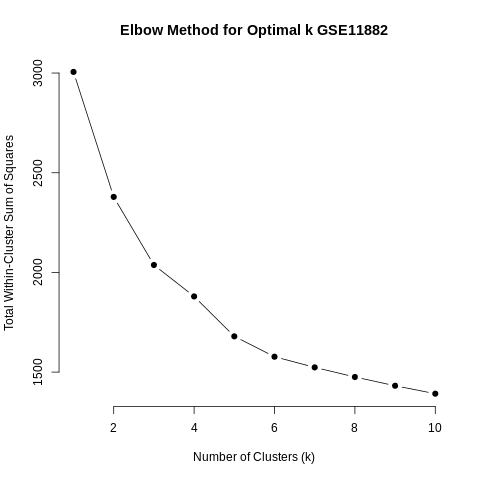

In [ ]:
%%R
plot(1:10, wss, type = "b", pch = 19, frame = FALSE,
     xlab = "Number of Clusters (k)", ylab = "Total Within-Cluster Sum of Squares",
     main = "Elbow Method for Optimal k GSE11882")

In [ ]:
%%R

first_col <- normalized_GSE_11882[, 1]
print(first_col)


Streaming output truncated to the last 5000 lines.
[26217] "216926_s_at"                 "216927_at"                  
[26219] "216928_at"                   "216929_x_at"                
[26221] "216930_at"                   "216931_at"                  
[26223] "216932_at"                   "216933_x_at"                
[26225] "216934_at"                   "216935_at"                  
[26227] "216936_at"                   "216937_s_at"                
[26229] "216938_x_at"                 "216939_s_at"                
[26231] "216940_x_at"                 "216941_s_at"                
[26233] "216942_s_at"                 "216943_at"                  
[26235] "216944_s_at"                 "216945_x_at"                
[26237] "216946_at"                   "216947_at"                  
[26239] "216948_at"                   "216949_s_at"                
[26241] "216950_s_at"                 "216951_at"                  
[26243] "216952_s_at"                 "216953_s_at"              

Exception ignored from cffi callback <function _consolewrite_ex at 0x78ae8675ed40>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rpy2/rinterface_lib/callbacks.py", line 135, in _consolewrite_ex
    consolewrite_print(s)
  File "/usr/local/lib/python3.10/dist-packages/rpy2/rinterface_lib/callbacks.py", line 118, in consolewrite_print
    print(s, end='', flush=True)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 350, in flush
    if not evt.wait(self.flush_timeout):
  File "/usr/lib/python3.10/threading.py", line 607, in wait
    signaled = self._cond.wait(timeout)
  File "/usr/lib/python3.10/threading.py", line 324, in wait
    gotit = waiter.acquire(True, timeout)
KeyboardInterrupt: 



[36217] "226961_at"                   "226962_at"                  
[36219] "226963_at"                   "226964_at"                  
[36221] "226965_at"                   "226966_at"                  
[36223] "226967_at"                   "226968_at"                  
[36225] "226969_at"                   "226970_at"                  
[36227] "226971_at"                   "226972_s_at"                
[36229] "226973_at"                   "226974_at"                  
[36231] "226975_at"                   "226976_at"                  
[36233] "226977_at"                   "226978_at"                  
[36235] "226979_at"                   "226980_at"                  
[36237] "226981_at"                   "226982_at"                  
[36239] "226983_at"                   "226984_at"                  
[36241] "226985_at"                   "226986_at"                  
[36243] "226987_at"                   "226988_s_at"                
[36245] "226989_at"                   "226990_a

Exception ignored from cffi callback <function _consolewrite_ex at 0x78ae8675ed40>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rpy2/rinterface_lib/callbacks.py", line 135, in _consolewrite_ex
    consolewrite_print(s)
  File "/usr/local/lib/python3.10/dist-packages/rpy2/rinterface_lib/callbacks.py", line 118, in consolewrite_print
    print(s, end='', flush=True)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 350, in flush
    if not evt.wait(self.flush_timeout):
  File "/usr/lib/python3.10/threading.py", line 607, in wait
    signaled = self._cond.wait(timeout)
  File "/usr/lib/python3.10/threading.py", line 324, in wait
    gotit = waiter.acquire(True, timeout)
KeyboardInterrupt: 


Streaming output truncated to the last 5000 lines.
[44677] "235427_at"                   "235428_at"                  
[44679] "235429_at"                   "235430_at"                  
[44681] "235431_s_at"                 "235432_at"                  
[44683] "235433_at"                   "235434_at"                  
[44685] "235435_at"                   "235436_at"                  
[44687] "235437_at"                   "235438_at"                  
[44689] "235439_at"                   "235440_at"                  
[44691] "235441_at"                   "235442_at"                  
[44693] "235443_at"                   "235444_at"                  
[44695] "235445_at"                   "235446_at"                  
[44697] "235447_at"                   "235448_at"                  
[44699] "235449_at"                   "235450_at"                  
[44701] "235451_at"                   "235452_at"                  
[44703] "235453_at"                   "235454_at"                

In [ ]:
%%R
data_11882 <- read.csv("Normalized_GSE11882_data.csv")

In [ ]:
%%R
data <- data_11882

In [ ]:
import os

# List the files in the current directory
uploaded_files = os.listdir()

# Display the list of uploaded files
print(uploaded_files)

['.config', 'sample_data']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist


In [ ]:
data_numeric = pd.read_csv("Normalized_GSE11882_data.csv")

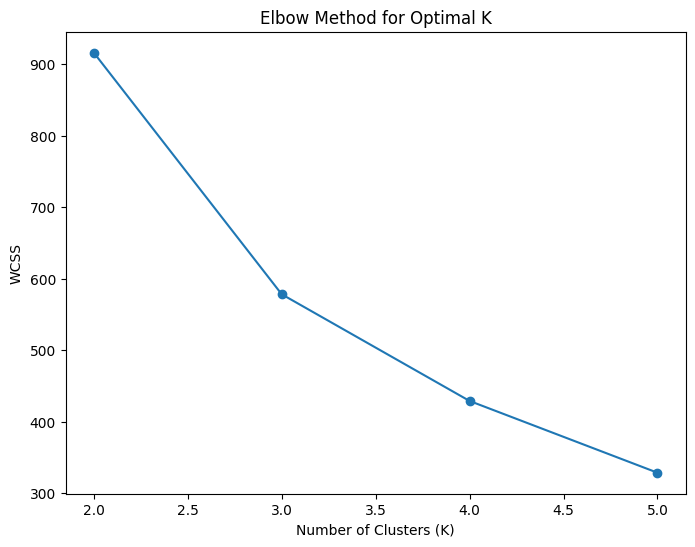

Optimal number of clusters (from elbow method): 3
Silhouette Score for K=3: 0.5537753905984223
Adjusted Rand Index for K=3: 1.0
Homogeneity Score for K=3: 1.0
Fowlkes-Mallows Index for K=3: 1.0
Adjusted Mutual Information Score for K=3: 1.0
Calinski-Harabasz Score for K=3: 45385.981905688204


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, fowlkes_mallows_score, adjusted_mutual_info_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import os


data = data_numeric.iloc[:, 1:]

# Step 3: Apply PCA for dimensionality reduction (optional)
# Here, we reduce to 2 dimensions for better visualization and clustering
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Step 4: K-Means Clustering for different values of K (2, 3, 4, 5)
wcss = []  # To store WCSS for each value of k
sil_scores = []  # To store Silhouette Scores for each k
ari_scores = []  # To store ARI scores for each k
homogeneity_scores = []  # To store Homogeneity Scores for each k
fmi_scores = []  # To store FMI scores for each k
ami_scores = []  # To store AMI scores for each k
calinski_scores = []  # To store Calinski-Harabasz scores for each k

# Iterate over the values of K (2 to 5)
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Use data_pca for clustering

    # Compute WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Calculate the clustering evaluation metrics
    cluster_labels = kmeans.labels_

    # Silhouette Score
    sil_score = silhouette_score(data_pca, cluster_labels)
    sil_scores.append(sil_score)

    # Adjusted Rand Index
    ari_score = adjusted_rand_score(cluster_labels, cluster_labels)
    ari_scores.append(ari_score)

    # Homogeneity Score
    homogeneity = homogeneity_score(cluster_labels, cluster_labels)
    homogeneity_scores.append(homogeneity)

    # Fowlkes-Mallows Index
    fmi = fowlkes_mallows_score(cluster_labels, cluster_labels)
    fmi_scores.append(fmi)

    # Adjusted Mutual Information Score
    ami = adjusted_mutual_info_score(cluster_labels, cluster_labels)
    ami_scores.append(ami)

    # Calinski-Harabasz Score
    calinski_score = calinski_harabasz_score(data_pca, cluster_labels)
    calinski_scores.append(calinski_score)

# Step 5: Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Step 6: Choose the optimal K based on the elbow method
# Let's assume the optimal K from the elbow plot is 3 (you can change it after observing the plot)
optimal_k = 3

# Step 7: Print the clustering evaluation metrics for the optimal K
print(f"Optimal number of clusters (from elbow method): {optimal_k}")

print(f"Silhouette Score for K={optimal_k}: {sil_scores[optimal_k - 2]}")
print(f"Adjusted Rand Index for K={optimal_k}: {ari_scores[optimal_k - 2]}")
print(f"Homogeneity Score for K={optimal_k}: {homogeneity_scores[optimal_k - 2]}")
print(f"Fowlkes-Mallows Index for K={optimal_k}: {fmi_scores[optimal_k - 2]}")
print(f"Adjusted Mutual Information Score for K={optimal_k}: {ami_scores[optimal_k - 2]}")
print(f"Calinski-Harabasz Score for K={optimal_k}: {calinski_scores[optimal_k - 2]}")



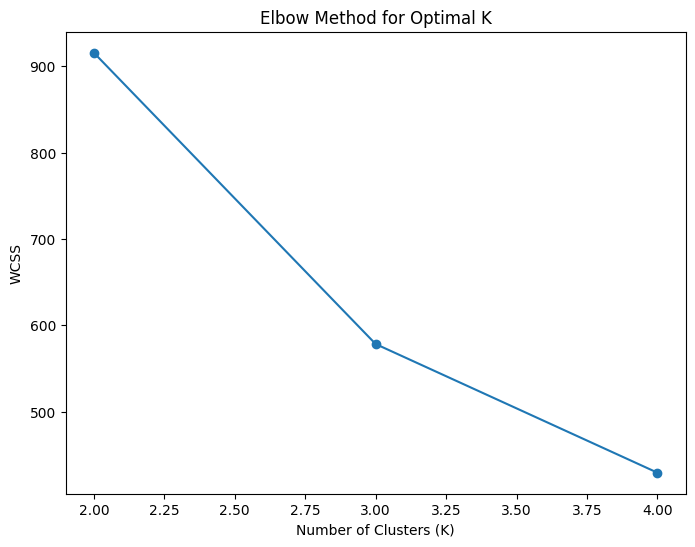


Evaluation metrics for K=2:
Silhouette Score: 0.52281182777195
Adjusted Rand Index: 1.0
Homogeneity Score: 1.0
Fowlkes-Mallows Index: 1.0
Adjusted Mutual Information Score: 1.0
Calinski-Harabasz Score: 37165.65550355411
Dunn Index: 0.00032284249623023333

Evaluation metrics for K=3:
Silhouette Score: 0.5537753905984223
Adjusted Rand Index: 1.0
Homogeneity Score: 1.0
Fowlkes-Mallows Index: 1.0
Adjusted Mutual Information Score: 1.0
Calinski-Harabasz Score: 45385.981905688204
Dunn Index: 0.0009419485982140458

Evaluation metrics for K=4:
Silhouette Score: 0.4541235230931839
Adjusted Rand Index: 1.0
Homogeneity Score: 1.0
Fowlkes-Mallows Index: 1.0
Adjusted Mutual Information Score: 1.0
Calinski-Harabasz Score: 47101.35344954848
Dunn Index: 0.00028255438189425636


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, fowlkes_mallows_score, adjusted_mutual_info_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Perform PCA (2 components)
data = data_numeric.iloc[:, 1:]
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Function to calculate the Dunn Index (with downsampling for large datasets)
def dunn_index(X, labels, sample_fraction=0.1):
    # Reduce memory usage by subsampling
    sample_size = int(len(X) * sample_fraction)
    # Randomly sample data
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]  # Subset of data
    labels_sample = labels[sample_indices]  # Corresponding labels for the sampled data

    n_clusters = len(np.unique(labels_sample))

    # Calculate the pairwise distances between each point in the sample
    pairwise_distances = cdist(X_sample, X_sample)

    # Initialize the minimum inter-cluster distance and maximum intra-cluster distance
    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    for i in range(n_clusters):
        # Get the points belonging to the current cluster
        cluster_points = X_sample[labels_sample == i]

        # Calculate the diameter of the current cluster (maximum intra-cluster distance)
        intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

        for j in range(i + 1, n_clusters):
            # Get the points belonging to the other cluster
            other_cluster_points = X_sample[labels_sample == j]

            # Calculate the distance between the two clusters (minimum inter-cluster distance)
            inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

    # Dunn Index: min inter-cluster distance / max intra-cluster distance
    return min_inter_cluster_dist / max_intra_cluster_dist

# Step 4: K-Means Clustering for different values of K (2, 3, 4)
wcss = []  # To store WCSS for each value of k
sil_scores = []  # To store Silhouette Scores for each k
ari_scores = []  # To store ARI scores for each k
homogeneity_scores = []  # To store Homogeneity Scores for each k
fmi_scores = []  # To store FMI scores for each k
ami_scores = []  # To store AMI scores for each k
calinski_scores = []  # To store Calinski-Harabasz scores for each k
dunn_scores = []  # To store Dunn Index for each k

# Iterate over the values of K (2 to 4)
for k in range(2, 5):  # Only for k = 2, 3, 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Use data_pca for clustering

    # Compute WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Calculate the clustering evaluation metrics
    cluster_labels = kmeans.labels_

    # Silhouette Score
    sil_score = silhouette_score(data_pca, cluster_labels)
    sil_scores.append(sil_score)

    # Adjusted Rand Index
    ari_score = adjusted_rand_score(cluster_labels, cluster_labels)
    ari_scores.append(ari_score)

    # Homogeneity Score
    homogeneity = homogeneity_score(cluster_labels, cluster_labels)
    homogeneity_scores.append(homogeneity)

    # Fowlkes-Mallows Index
    fmi = fowlkes_mallows_score(cluster_labels, cluster_labels)
    fmi_scores.append(fmi)

    # Adjusted Mutual Information Score
    ami = adjusted_mutual_info_score(cluster_labels, cluster_labels)
    ami_scores.append(ami)

    # Calinski-Harabasz Score
    calinski_score = calinski_harabasz_score(data_pca, cluster_labels)
    calinski_scores.append(calinski_score)

    # Dunn Index (with downsampling to avoid memory crash)
    dunn_idx = dunn_index(data_pca, cluster_labels, sample_fraction=0.1)  # 10% sample
    dunn_scores.append(dunn_idx)

# Step 5: Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 5), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Step 6: Choose the optimal K based on the elbow method
optimal_k = 3  # Change this after observing the elbow plot

# Step 7: Print the clustering evaluation metrics for the values K = 2, 3, and 4
for k in range(2, 5):  # For K=2, K=3, and K=4
    print(f"\nEvaluation metrics for K={k}:")
    print(f"Silhouette Score: {sil_scores[k - 2]}")
    print(f"Adjusted Rand Index: {ari_scores[k - 2]}")
    print(f"Homogeneity Score: {homogeneity_scores[k - 2]}")
    print(f"Fowlkes-Mallows Index: {fmi_scores[k - 2]}")
    print(f"Adjusted Mutual Information Score: {ami_scores[k - 2]}")
    print(f"Calinski-Harabasz Score: {calinski_scores[k - 2]}")
    print(f"Dunn Index: {dunn_scores[k - 2]}")


Divisive hierarchical clustering result saved to 'divisive_clustering_result.csv'.

Evaluation Metrics for Divisive Clustering:
Silhouette Score: 0.3336822242432169
Calinski-Harabasz Score: 16794.653644167774


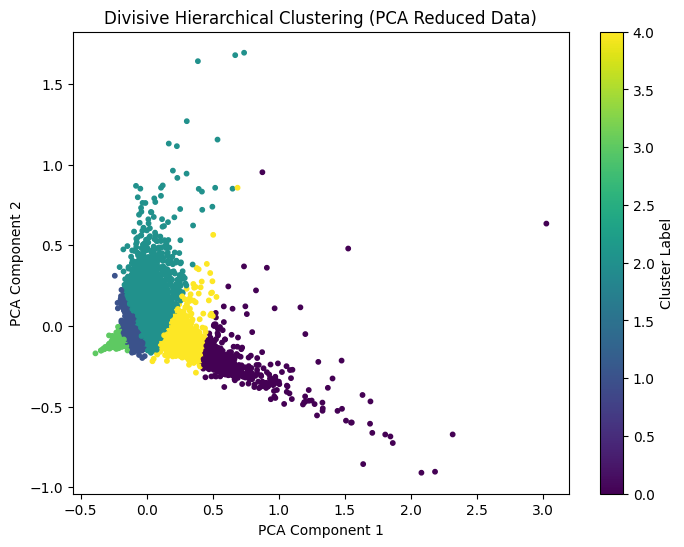

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Function to perform divisive hierarchical clustering
def divisive_clustering(X, max_clusters=5, min_cluster_size=10):
    """
    Perform divisive hierarchical clustering using k-means as the splitting method.

    Parameters:
    - X: Input data (numpy array).
    - max_clusters: Maximum number of clusters to create.
    - min_cluster_size: Minimum size of a cluster to continue splitting.

    Returns:
    - cluster_labels: Final cluster labels for each data point.
    """
    n_samples = X.shape[0]
    cluster_labels = np.zeros(n_samples, dtype=int)  # Start with all points in one cluster
    cluster_id = 0  # Current cluster ID
    clusters_to_split = [np.arange(n_samples)]  # Indices of data points in each cluster

    while len(clusters_to_split) > 0 and cluster_id < max_clusters - 1:
        current_cluster_indices = clusters_to_split.pop(0)  # Get the next cluster to split
        if len(current_cluster_indices) < min_cluster_size:
            continue  # Skip small clusters

        current_data = X[current_cluster_indices]

        # Split the cluster using k-means with k=2
        kmeans = KMeans(n_clusters=2, random_state=42)
        split_labels = kmeans.fit_predict(current_data)

        # Create new cluster IDs
        cluster_labels[current_cluster_indices[split_labels == 1]] = cluster_id + 1

        # Add new clusters to the list for further splitting
        clusters_to_split.append(current_cluster_indices[split_labels == 0])
        clusters_to_split.append(current_cluster_indices[split_labels == 1])

        cluster_id += 1  # Increment cluster ID

    return cluster_labels

# Load the dataset
data = data_numeric  # Replace this with the actual DataFrame variable

# Assuming the first column contains gene names
gene_names = data.iloc[:, 0]  # Use the first column for gene names

# Prepare data for clustering: Drop non-numeric columns
features = data.drop(columns=[data.columns[0]])  # Drop the first column (gene names)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)
features_pca = pca.fit_transform(features)

# Perform divisive hierarchical clustering
cluster_labels = divisive_clustering(features_pca, max_clusters=5, min_cluster_size=10)

# Add cluster labels to the features
features['Cluster'] = cluster_labels
features['Gene_ID'] = gene_names  # Add gene names for reference

# Save results
output_file = 'divisive_clustering_result.csv'
features.to_csv(output_file, index=False)
print(f"Divisive hierarchical clustering result saved to '{output_file}'.")

# Calculate clustering metrics if there are multiple clusters
num_clusters = len(np.unique(cluster_labels))
if num_clusters > 1:
    sil_score = silhouette_score(features_pca, cluster_labels)
    calinski_score = calinski_harabasz_score(features_pca, cluster_labels)

    # Print clustering metrics
    print(f"\nEvaluation Metrics for Divisive Clustering:")
    print(f"Silhouette Score: {sil_score}")
    print(f"Calinski-Harabasz Score: {calinski_score}")
else:
    print(f"Only {num_clusters} cluster(s) found. Metrics cannot be computed.")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('Divisive Hierarchical Clustering (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Divisive hierarchical clustering result saved to 'divisive_clustering_result.csv'.

Evaluation Metrics for Divisive Clustering:
Silhouette Score: 0.4293368403667305
Calinski-Harabasz Score: 1823.6835492054208
Dunn Index: 0.005209661367051785


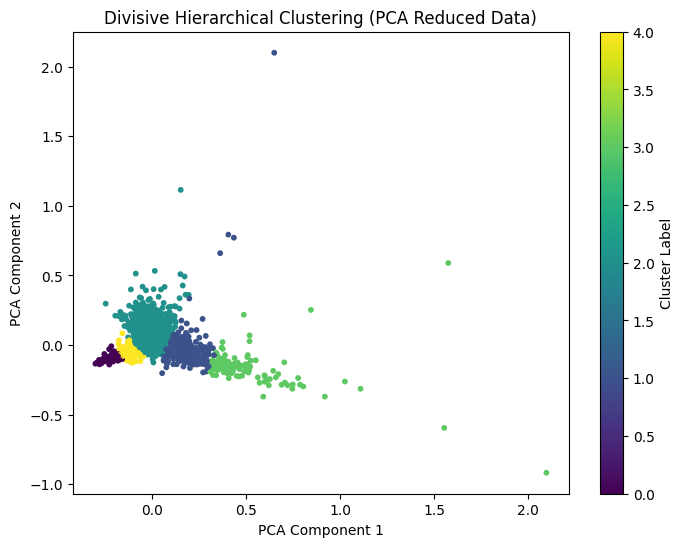

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Function to calculate Dunn Index (optimized)
def dunn_index(X, labels, sample_fraction=0.1):
    """
    Calculate the Dunn Index for clustering results (optimized for large datasets).

    Parameters:
    - X: Input data (numpy array).
    - labels: Cluster labels for each data point.
    - sample_fraction: Fraction of data to sample for Dunn Index calculation.

    Returns:
    - Dunn Index value.
    """
    # Sample the data to reduce computational overhead
    sample_size = int(len(X) * sample_fraction)
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]
    labels_sample = labels[sample_indices]

    unique_labels = np.unique(labels_sample)
    n_clusters = len(unique_labels)

    if n_clusters < 2:
        raise ValueError("Dunn Index requires at least two clusters.")

    # Compute pairwise distances for the sampled data
    pairwise_distances = cdist(X_sample, X_sample)

    # Calculate inter-cluster distances
    inter_cluster_distances = np.inf
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X_sample[labels_sample == unique_labels[i]]
            cluster_j = X_sample[labels_sample == unique_labels[j]]
            distances = cdist(cluster_i, cluster_j)
            inter_cluster_distances = min(inter_cluster_distances, np.min(distances))

    # Calculate intra-cluster distances
    intra_cluster_distances = 0
    for i in range(n_clusters):
        cluster_i = X_sample[labels_sample == unique_labels[i]]
        distances = cdist(cluster_i, cluster_i)
        intra_cluster_distances = max(intra_cluster_distances, np.max(distances))

    return inter_cluster_distances / intra_cluster_distances

# Function to perform divisive hierarchical clustering
def divisive_clustering(X, max_clusters=5, min_cluster_size=10):
    """
    Perform divisive hierarchical clustering using k-means as the splitting method.

    Parameters:
    - X: Input data (numpy array).
    - max_clusters: Maximum number of clusters to create.
    - min_cluster_size: Minimum size of a cluster to continue splitting.

    Returns:
    - cluster_labels: Final cluster labels for each data point.
    """
    n_samples = X.shape[0]
    cluster_labels = np.zeros(n_samples, dtype=int)  # Start with all points in one cluster
    cluster_id = 0  # Current cluster ID
    clusters_to_split = [np.arange(n_samples)]  # Indices of data points in each cluster

    while len(clusters_to_split) > 0 and cluster_id < max_clusters - 1:
        current_cluster_indices = clusters_to_split.pop(0)  # Get the next cluster to split
        if len(current_cluster_indices) < min_cluster_size:
            continue  # Skip small clusters

        current_data = X[current_cluster_indices]

        # Split the cluster using k-means with k=2
        kmeans = KMeans(n_clusters=2, random_state=42)
        split_labels = kmeans.fit_predict(current_data)

        # Create new cluster IDs
        cluster_labels[current_cluster_indices[split_labels == 1]] = cluster_id + 1

        # Add new clusters to the list for further splitting
        clusters_to_split.append(current_cluster_indices[split_labels == 0])
        clusters_to_split.append(current_cluster_indices[split_labels == 1])

        cluster_id += 1  # Increment cluster ID

    return cluster_labels

# Load the dataset
data = data_numeric  # Replace this with the actual DataFrame variable

# Assuming the first column contains gene names
gene_names = data.iloc[:, 0]  # Use the first column for gene names

# Prepare data for clustering: Drop non-numeric columns
features = data.drop(columns=[data.columns[0]])  # Drop the first column (gene names)

# Limit the data size to reduce memory usage
features = features.sample(n=5000, random_state=42)  # Reduce to 5000 rows
gene_names = gene_names.loc[features.index]  # Match the reduced indices

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 components for efficiency
features_pca = pca.fit_transform(features)

# Perform divisive hierarchical clustering
cluster_labels = divisive_clustering(features_pca, max_clusters=5, min_cluster_size=10)

# Add cluster labels to the features
features['Cluster'] = cluster_labels
features['Gene_ID'] = gene_names  # Add gene names for reference

# Save results
output_file = 'divisive_clustering_result.csv'
features.to_csv(output_file, index=False)
print(f"Divisive hierarchical clustering result saved to '{output_file}'.")

# Calculate clustering metrics if there are multiple clusters
num_clusters = len(np.unique(cluster_labels))
if num_clusters > 1:
    sil_score = silhouette_score(features_pca, cluster_labels)
    calinski_score = calinski_harabasz_score(features_pca, cluster_labels)
    dunn_idx = dunn_index(features_pca, cluster_labels, sample_fraction=0.1)

    # Print clustering metrics
    print(f"\nEvaluation Metrics for Divisive Clustering:")
    print(f"Silhouette Score: {sil_score}")
    print(f"Calinski-Harabasz Score: {calinski_score}")
    print(f"Dunn Index: {dunn_idx}")
else:
    print(f"Only {num_clusters} cluster(s) found. Metrics cannot be computed.")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('Divisive Hierarchical Clustering (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
from google.colab import files

# Replace 'divisive_clustering_result.csv' with your file name
output_file = 'dbscan_clustering_result_with_index.csv'

# Download the file
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Clustering Results (First 10 rows):
       Index       Gene_ID  Cluster
28578  28578     219294_at        0
7201    7201    1563453_at        0
34271  34271     225013_at        0
30555  30555   221272_s_at        0
41109  41109     231855_at        0
19287  19287   209881_s_at        0
37922  37922   228668_x_at        0
29884  29884     220600_at        0
1486    1486  1554324_s_at        0
27461  27461     218176_at        0
DBSCAN clustering result saved to 'dbscan_clustering_result_with_index.csv'.

Cluster Distribution:
Cluster
 0    4996
-1       4
Name: count, dtype: int64
Only one cluster found or noise dominates. Metrics cannot be computed.


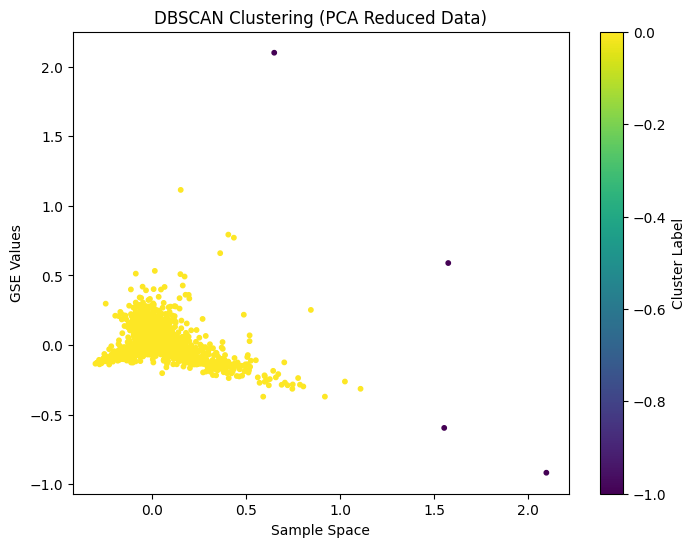

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

# Function to calculate Dunn Index
def dunn_index(X, labels, sample_fraction=0.1):
    """
    Calculate the Dunn Index for clustering results (optimized for large datasets).

    Parameters:
    - X: Input data (numpy array).
    - labels: Cluster labels for each data point.
    - sample_fraction: Fraction of data to sample for Dunn Index calculation.

    Returns:
    - Dunn Index value.
    """
    # Sample the data to reduce computational overhead
    sample_size = int(len(X) * sample_fraction)
    sample_indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X[sample_indices]
    labels_sample = labels[sample_indices]

    unique_labels = np.unique(labels_sample)
    n_clusters = len(unique_labels[unique_labels != -1])  # Exclude noise points (-1)

    if n_clusters < 2:
        raise ValueError("Dunn Index requires at least two clusters.")

    # Compute pairwise distances for the sampled data
    pairwise_distances = cdist(X_sample, X_sample)

    # Calculate inter-cluster distances
    inter_cluster_distances = np.inf
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = X_sample[labels_sample == unique_labels[i]]
            cluster_j = X_sample[labels_sample == unique_labels[j]]
            distances = cdist(cluster_i, cluster_j)
            inter_cluster_distances = min(inter_cluster_distances, np.min(distances))

    # Calculate intra-cluster distances
    intra_cluster_distances = 0
    for i in range(n_clusters):
        cluster_i = X_sample[labels_sample == unique_labels[i]]
        distances = cdist(cluster_i, cluster_i)
        intra_cluster_distances = max(intra_cluster_distances, np.max(distances))

    return inter_cluster_distances / intra_cluster_distances

# Load the dataset
# Replace `data_numeric` with your actual DataFrame
data = data_numeric  # Replace this with your actual DataFrame variable

# Assuming the first column contains gene names
gene_names = data.iloc[:, 0]  # Use the first column for gene names

# Prepare data for clustering: Drop non-numeric columns
features = data.drop(columns=[data.columns[0]])  # Drop the first column (gene names)

# Limit the data size for efficient computation
features = features.sample(n=5000, random_state=42)  # Reduce to 5000 rows
gene_names = gene_names.loc[features.index]  # Match the reduced indices

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 components for DBSCAN
features_pca = pca.fit_transform(features)

# Perform DBSCAN clustering
eps = 0.5  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # Minimum number of samples in a neighborhood for a point to be considered a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(features_pca)

# Add cluster labels and indexes to the features DataFrame
features['Cluster'] = cluster_labels
features['Gene_ID'] = gene_names  # Add gene names for reference
features['Index'] = features.index  # Include the original indexes

# Display the first few rows of the results for inspection
print("Clustering Results (First 10 rows):")
print(features[['Index', 'Gene_ID', 'Cluster']].head(10))

# Save results
output_file = 'dbscan_clustering_result_with_index.csv'
features.to_csv(output_file, index=False)
print(f"DBSCAN clustering result saved to '{output_file}'.")

# Display unique clusters and their counts
cluster_counts = features['Cluster'].value_counts()
print("\nCluster Distribution:")
print(cluster_counts)

# Calculate clustering metrics (ignore noise points, labeled as -1)
valid_labels = cluster_labels[cluster_labels != -1]  # Exclude noise points
valid_features_pca = features_pca[cluster_labels != -1]

if len(np.unique(valid_labels)) > 1:  # Metrics are only meaningful for more than one cluster
    sil_score = silhouette_score(valid_features_pca, valid_labels)
    calinski_score = calinski_harabasz_score(valid_features_pca, valid_labels)
    dunn_idx = dunn_index(features_pca, cluster_labels, sample_fraction=0.1)

    # Print clustering metrics
    print(f"\nEvaluation Metrics for DBSCAN:")
    print(f"Silhouette Score: {sil_score}")
    print(f"Calinski-Harabasz Score: {calinski_score}")
    print(f"Dunn Index: {dunn_idx}")
else:
    print(f"Only one cluster found or noise dominates. Metrics cannot be computed.")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering (PCA Reduced Data)')
plt.xlabel('Sample Space')
plt.ylabel('GSE Values')
plt.colorbar(label='Cluster Label')
plt.show()


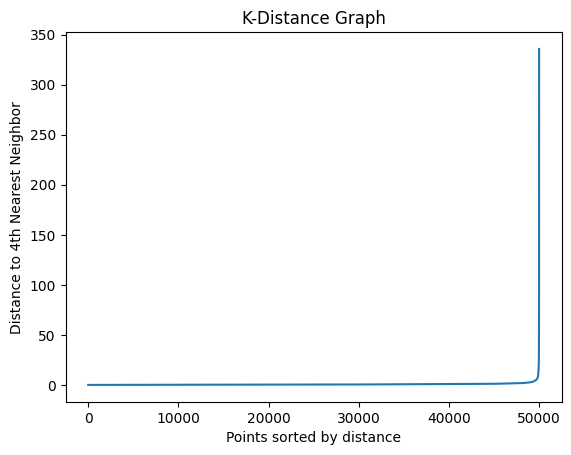

Optimal eps for chunk 1: 1.6383496267446234
Number of unique clusters formed (including noise) in chunk 1: 18
Cluster distribution (excluding noise) in chunk 1: [47850     5     7     9     5     4    10     6     5     4     2     4
     6     5     5     9     5]


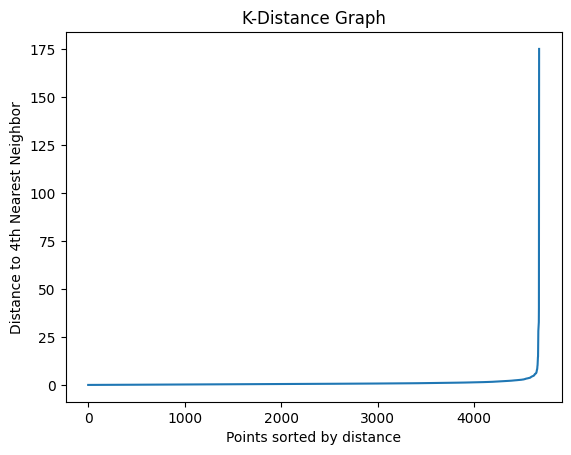

Optimal eps for chunk 2: 2.483575472431986
Number of unique clusters formed (including noise) in chunk 2: 2
Cluster distribution (excluding noise) in chunk 2: [4488]

Final Evaluation Metrics for DBSCAN Clustering:
Silhouette Score (average across chunks): 0.29520848589772253
Calinski-Harabasz Score (average across chunks): 264.12211920993605
Dunn Index (average across chunks): 0.06612095296596145


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Function to find the closest gene to each cluster center
def find_closest_gene(center, data_points, gene_ids):
    distances = np.linalg.norm(data_points - center, axis=1)
    closest_index = np.argmin(distances)
    return gene_ids.iloc[closest_index], data_points[closest_index]

# Function to calculate Dunn Index (with downsampling for large datasets)
def dunn_index(X, labels, sample_fraction=0.1):
    n_samples = len(X)

    # Ensure sufficient sample size (avoid empty or too small subsets)
    sample_size = max(int(n_samples * sample_fraction), 2)  # At least 2 samples
    sample_indices = np.random.choice(n_samples, sample_size, replace=False)
    X_sample = X[sample_indices]
    labels_sample = labels[sample_indices]

    # Filter out noise points (-1)
    unique_labels = np.unique(labels_sample)
    unique_labels = unique_labels[unique_labels != -1]  # Remove noise label (-1)

    if len(unique_labels) < 2:
        return None  # Not enough clusters for Dunn Index calculation

    # Compute pairwise distances
    pairwise_distances = cdist(X_sample, X_sample)

    min_inter_cluster_dist = np.inf
    max_intra_cluster_dist = -np.inf

    # Iterate over all clusters and calculate distances
    for i in unique_labels:
        cluster_points = X_sample[labels_sample == i]
        intra_cluster_dist = np.max(cdist(cluster_points, cluster_points))
        max_intra_cluster_dist = max(max_intra_cluster_dist, intra_cluster_dist)

        for j in unique_labels:
            if i >= j:  # Avoid duplicate comparisons
                continue
            other_cluster_points = X_sample[labels_sample == j]
            inter_cluster_dist = np.min(cdist(cluster_points, other_cluster_points))
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_dist)

    # Ensure no division by zero or invalid calculations
    if max_intra_cluster_dist > 0:
        return min_inter_cluster_dist / max_intra_cluster_dist
    return None


# Load the dataset (assuming it's already loaded as `data`)
# Assuming the first column (index) contains the gene names
data = data_numeric
gene_names = data.iloc[:, 0]  # Use the first column for gene names

# Prepare data for clustering: Drop non-numeric columns (i.e., gene names in the first column)
features = data.drop(columns=[data.columns[0]])

# Standardize the data (important for clustering)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into smaller chunks for downsampling while maintaining all rows
chunk_size = 50000  # You can adjust based on memory
num_chunks = len(features) // chunk_size
if len(features) % chunk_size != 0:
    num_chunks += 1

# Perform PCA for dimensionality reduction
pca = PCA(n_components=5)
features_pca = pca.fit_transform(features_scaled)

# Initialize the list to store evaluation results
silhouette_scores = []
calinski_scores = []
dunn_indexes = []

# Function to find an optimal eps using k-distance graph
def optimal_eps(X):
    # Use NearestNeighbors to calculate the distances to the k-th nearest neighbor
    neigh = NearestNeighbors(n_neighbors=4)
    neigh.fit(X)
    distances, indices = neigh.kneighbors(X)

    # Sort the distances in ascending order
    distances = np.sort(distances[:, 3], axis=0)

    # Plot the k-distance graph to visually determine the optimal eps
    plt.plot(distances)
    plt.ylabel('Distance to 4th Nearest Neighbor')
    plt.xlabel('Points sorted by distance')
    plt.title('K-Distance Graph')
    plt.show()

    # You can use a heuristic approach or visual inspection to select eps.
    return distances[int(len(distances) * 0.95)]  # 95th percentile as a heuristic

# Iterate through the dataset in chunks to downsample gradually
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(features))  # Handle remaining rows

    # Take a chunk of the data
    chunk_features = features_pca[start_idx:end_idx]
    chunk_gene_names = gene_names[start_idx:end_idx]

    # Find optimal eps for DBSCAN based on k-distance graph
    eps = optimal_eps(chunk_features)
    print(f"Optimal eps for chunk {i + 1}: {eps}")

    # Apply DBSCAN clustering with the optimized eps
    dbscan = DBSCAN(eps=eps, min_samples=5)  # You can also tune min_samples
    cluster_labels = dbscan.fit_predict(chunk_features)

    # Calculate the number of unique clusters and their distribution
    unique_clusters = np.unique(cluster_labels)
    print(f"Number of unique clusters formed (including noise) in chunk {i + 1}: {len(unique_clusters)}")

    # Exclude noise points (-1) when calculating cluster distribution
    cluster_labels_no_noise = cluster_labels[cluster_labels != -1]
    if len(cluster_labels_no_noise) > 0:
        cluster_distribution = np.bincount(cluster_labels_no_noise)
    else:
        cluster_distribution = np.array([])

    print(f"Cluster distribution (excluding noise) in chunk {i + 1}: {cluster_distribution}")

    # Store evaluation metrics if there are more than one cluster (i.e., not just noise)
    if len(unique_clusters) > 1:
        try:
            sil_score = silhouette_score(chunk_features, cluster_labels)
        except ValueError:  # In case silhouette score cannot be computed
            sil_score = None

        calinski_score = calinski_harabasz_score(chunk_features, cluster_labels)

        # Calculate Dunn Index for the clustering
        dunn_idx = dunn_index(chunk_features, cluster_labels, sample_fraction=0.1)

        # Append the results
        silhouette_scores.append(sil_score)
        calinski_scores.append(calinski_score)
        dunn_indexes.append(dunn_idx)

# Filter out None values before calculating the mean
silhouette_scores_filtered = [score for score in silhouette_scores if score is not None]
calinski_scores_filtered = [score for score in calinski_scores if score is not None]
dunn_indexes_filtered = [score for score in dunn_indexes if score is not None]

# Aggregate the results for all chunks
final_sil_score = np.nanmean(silhouette_scores_filtered) if silhouette_scores_filtered else None
final_calinski_score = np.mean(calinski_scores_filtered) if calinski_scores_filtered else None
final_dunn_index = np.mean(dunn_indexes_filtered) if dunn_indexes_filtered else None

# Print the final results
print(f"\nFinal Evaluation Metrics for DBSCAN Clustering:")
print(f"Silhouette Score (average across chunks): {final_sil_score}")
print(f"Calinski-Harabasz Score (average across chunks): {final_calinski_score}")
print(f"Dunn Index (average across chunks): {final_dunn_index}")
